<a href="https://colab.research.google.com/github/freealise/freealise/blob/main/opencv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ffmpy
import IPython.display as display
from ffmpy import FFmpeg
ff = FFmpeg(
    inputs={'movie.mp4': None },
    outputs={'output.png': '-f apng -vf "chromakey=0xffffff:0.01:0.2"' }
)
ff.run()
ff = FFmpeg(
    inputs={'output.png': None},
    outputs={'output.gif': None}
)
ff.run()
video="output.gif"
display.display(display.Markdown(F"""![]({video})"""))

![](output.gif)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


224
0
1
2
3


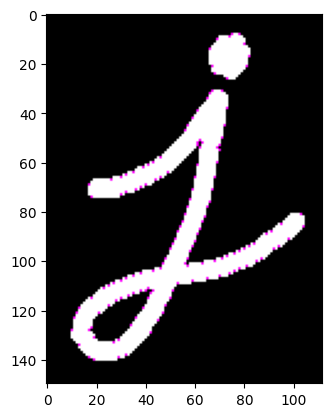

[["x", "y"], [67, 31], [66, 32], [65, 34], [61, 39], [59, 42], [57, 45], [56, 47], [46, 58], [43, 60], [41, 61], [39, 62], [35, 64], [32, 65], [30, 66], [26, 67], [17, 69], [18, 74], [30, 73], [32, 72], [36, 71], [38, 70], [40, 69], [44, 67], [46, 66], [49, 64], [61, 53], [62, 54], [61, 61], [60, 66], [59, 71], [58, 75], [57, 78], [56, 81], [55, 84], [54, 86], [53, 88], [52, 91], [51, 93], [50, 95], [48, 99], [47, 101], [46, 103], [43, 104], [38, 105], [35, 106], [32, 107], [30, 108], [27, 109], [25, 110], [23, 111], [18, 115], [13, 119], [12, 121], [11, 123], [10, 128], [13, 134], [17, 139], [19, 140], [29, 139], [32, 138], [42, 129], [45, 124], [47, 121], [48, 118], [50, 115], [51, 112], [53, 109], [59, 108], [65, 107], [70, 106], [74, 105], [76, 104], [78, 103], [81, 102], [85, 100], [87, 99], [92, 95], [94, 94], [98, 91], [104, 86], [103, 81], [95, 85], [91, 88], [89, 89], [84, 93], [82, 94], [80, 95], [78, 96], [76, 97], [73, 98], [71, 99], [68, 100], [63, 101], [57, 102], [56, 10

'html = """\n<script type="text/javascript" src="https://www.gstatic.com/charts/loader.js"></script>\n    <script type="text/javascript">\ntry {\n      var xmlns = "http://www.w3.org/2000/svg";\n      var arr = """ + txt + """;\n      /*[\n          [\'x\', \'y\'],\n          [2,  1000],\n          [4,  1170],\n          [3,  660],\n          [1,  1030],\n          [2.5,  800],\n          [3.5,  950],\n      ];*/\n      //triangulate raw polyline points, chart edge (ispointinstroke)\n      //points not on edge for fill colors (triangle color is density)\n\n      var mp = [];\n      for (var i=0; i<arr[0].length; i++) {\n        mp[i] = (arr[1][i]+arr[arr.length-1][i])/2;\n      }\n      arr.splice(1, 0, mp);\n      arr.splice(arr.length, 0, mp);\n\n      google.charts.load(\'current\', {\'packages\':[\'corechart\']});\n      google.charts.setOnLoadCallback(drawChart);\n\n      function drawChart() {\n        var data = google.visualization.arrayToDataTable(arr);\n\n        var options 

In [37]:
import numpy as np
import cv2 as cv
import json as json
from matplotlib import pyplot as plt
from IPython.core.display import display, HTML

im = cv.imread('morphology.png')
assert im is not None, "file could not be read, check with os.path.exists()"
imgray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(imgray, 127, 255, 0)
contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
print(contours[0].shape[0])

arr = [['x', 'y']]
j=0
while j<len(contours):
  print(j)
  i=0
  xold=-2
  yold=-2

  while i<contours[j].shape[0]:
    x = contours[j][i].flatten()[0]
    y = contours[j][i].flatten()[1]
    if abs(x-xold)>=1 and abs(y-yold)>=1:
      im[y,x,1] = 0
      arr.append([int(x), int(y)])
    xold=x
    yold=y
    i=i+1
  j=j+1
#cv.drawContours(im, contours, -1, (255,0,255))
plt.imshow(im, 'gray')
plt.show()
txt = json.dumps(arr)
print(txt)

'''html = """
<script type="text/javascript" src="https://www.gstatic.com/charts/loader.js"></script>
    <script type="text/javascript">
try {
      var xmlns = "http://www.w3.org/2000/svg";
      var arr = """ + txt + """;
      /*[
          ['x', 'y'],
          [2,  1000],
          [4,  1170],
          [3,  660],
          [1,  1030],
          [2.5,  800],
          [3.5,  950],
      ];*/
      //triangulate raw polyline points, chart edge (ispointinstroke)
      //points not on edge for fill colors (triangle color is density)

      var mp = [];
      for (var i=0; i<arr[0].length; i++) {
        mp[i] = (arr[1][i]+arr[arr.length-1][i])/2;
      }
      arr.splice(1, 0, mp);
      arr.splice(arr.length, 0, mp);

      google.charts.load('current', {'packages':['corechart']});
      google.charts.setOnLoadCallback(drawChart);

      function drawChart() {
        var data = google.visualization.arrayToDataTable(arr);

        var options = {
          title: 'Tracer',
          curveType: 'function',
          legend: { position: 'bottom' },
          hAxis: {
            viewWindow: {
              min: 0,
              max: 5
            }
          }
        };

        var chart = new google.visualization.LineChart(document.getElementById('curve_chart'));

        chart.draw(data, options);

        document.getElementsByTagName('svg')[1].setAttribute('height', ""+parseInt(document.getElementById('curve_chart').style.height));
        document.getElementsByTagName('svg')[1].setAttribute('width',  ""+parseInt(document.getElementById('curve_chart').style.width));

        var paths = document.getElementsByTagName('svg')[0].getElementsByTagName('path').length;

        for (var i=0; i<paths; i++) {
          var g = document.createElementNS(xmlns, "g");
          g.setAttributeNS(null, 'fill', 'gray');
          document.getElementsByTagName('svg')[1].appendChild(g);

          var p = document.getElementsByTagName('svg')[0].getElementsByTagName('path')[paths-i-1];
          var s = p.getAttribute('stroke');
          p.setAttribute('fill', s);
          document.getElementsByTagName('svg')[1].appendChild(p);

          var step = 5;
          var polyline = "";
          for (var j=0; j<p.getTotalLength()+step; j+=step) {
            var d = p.getPointAtLength(j);
            polyline += Math.round(d.x) + "," + Math.round(d.y) + " ";
          }
          polyline = polyline.slice(0, -1);

          var line = document.createElementNS(xmlns, "polyline");
          line.setAttributeNS(null, 'points', polyline);
          line.setAttributeNS(null, 'stroke', 'black');
          line.setAttributeNS(null, 'stroke-width', '3');
          line.setAttributeNS(null, 'fill', 'none');
          document.getElementsByTagName('svg')[1].appendChild(line);

          polyline = "0,0,500,0,0,250,500,250," + polyline.replace(/\s/g, ",");
          var points = polyline.split(",");
          for (var j=0; j<points.length; j++) {
            points[j] = parseInt(points[j]);
          }

          //const triangles = earcut.default(points);
          //const delaunay = new Delaunator(points);
          //const triangles = delaunay.triangles;
          //console.log(triangles);

          /*for (var j=0; j<triangles.length; j+=3) {
            var pt0 = [points[triangles[j]*2], points[triangles[j]*2+1]];
            var pt1 = [points[triangles[j+1]*2], points[triangles[j+1]*2+1]];
            var pt2 = [points[triangles[j+2]*2], points[triangles[j+2]*2+1]];
            var mid = [(pt0[0]+pt1[0]+pt2[0])/3, (pt0[1]+pt1[1]+pt2[1])/3];
            var mid01 = [(pt0[0]+pt1[0])/2, (pt0[1]+pt1[1])/2];
            var mid12 = [(pt1[0]+pt2[0])/2, (pt1[1]+pt2[1])/2];
            var mid20 = [(pt2[0]+pt0[0])/2, (pt2[1]+pt0[1])/2];
            const mpt = document.getElementsByTagName('svg')[1].createSVGPoint();
            mpt.x = mid[0];
            mpt.y = mid[1];

            const m01 = document.getElementsByTagName('svg')[1].createSVGPoint();
            m01.x = mid01[0];
            m01.y = mid01[1];
            const m12 = document.getElementsByTagName('svg')[1].createSVGPoint();
            m12.x = mid12[0];
            m12.y = mid12[1];
            const m20 = document.getElementsByTagName('svg')[1].createSVGPoint();
            m20.x = mid20[0];
            m20.y = mid20[1];

            if (line.isPointInFill(mpt)) {
              var tr = document.createElementNS(xmlns, "polyline");
              tr.setAttributeNS(null, 'points', pt0.join(",") + " " + pt1.join(",") + " " + pt2.join(","));
              tr.setAttributeNS(null, 'stroke', 'none');
              tr.setAttributeNS(null, 'fill', 'none');
              document.getElementsByTagName('svg')[1].appendChild(tr);

            } else if (line.isPointInStroke(m01) || line.isPointInFill(m01)) {
              var ln = document.createElementNS(xmlns, "polyline");
              ln.setAttributeNS(null, 'points', pt0.join(",") + " " + pt1.join(","));
              ln.setAttributeNS(null, 'stroke', 'lightgray');
              ln.setAttributeNS(null, 'fill', 'none');
              document.getElementsByTagName('svg')[1].appendChild(ln);

            } else if (line.isPointInStroke(m12) || line.isPointInFill(m12)) {
              var ln = document.createElementNS(xmlns, "polyline");
              ln.setAttributeNS(null, 'points', pt1.join(",") + " " + pt2.join(","));
              ln.setAttributeNS(null, 'stroke', 'lightgray');
              ln.setAttributeNS(null, 'fill', 'none');
              document.getElementsByTagName('svg')[1].appendChild(ln);

            } else if (line.isPointInStroke(m20) || line.isPointInFill(m20)) {
              var ln = document.createElementNS(xmlns, "polyline");
              ln.setAttributeNS(null, 'points', pt2.join(",") + " " + pt0.join(","));
              ln.setAttributeNS(null, 'stroke', 'lightgray');
              ln.setAttributeNS(null, 'fill', 'none');
              document.getElementsByTagName('svg')[1].appendChild(ln);

            } else {
              var tr = document.createElementNS(xmlns, "polyline");
              tr.setAttributeNS(null, 'points', pt0.join(",") + " " + pt1.join(",") + " " + pt2.join(","));
              tr.setAttributeNS(null, 'stroke', 'gray');
              tr.setAttributeNS(null, 'fill', 'none');
              document.getElementsByTagName('svg')[1].appendChild(tr);
            }

          }*/
        }
      }
} catch(e) {console.log(e);}
    </script>
    <div id="curve_chart" style="width: 512px; height: 256px"></div>
    <svg xmlns="http://www.w3.org/2000/svg"></svg>
"""
display(HTML(html))'''